## IBS 4

Smith – Waterman - Python

Code created by <b>Dharshan Kumar K S</b>

<pre>
<u>Local alignment:</u>
Align regions of two sequences which are highly similar

<u>Smith-Waterman method:</u>
•	Smith-Waterman algorithm is the most commonly used one
•	It comes under Dynamic Programming
•	General three steps involved are 1) Initialization, 2) Matrix Filling, 3) Traceback
•	Smith-Waterman method is similar to Needleman-Wunsch method
•	The difference is that the negative values are replaced with zeros
•	Match –> 1, Mismatch –> -1, Gap -> -2
</pre>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def AGCT_to_num(seq1):
    seqs1=[]
    for i in seq1:
        if(i=="A"):
            seqs1.append(1)
        elif(i=="G"):
            seqs1.append(2)
        elif(i=="C"):
            seqs1.append(3)
        if(i=="T"):
            seqs1.append(4)    
    return seqs1

#If a value is negative, then changes to 0
#If a value is positive, then it remains the same
def if_neg(val):
    if(val<0):
        return 0
    else:
        return val

#### 1) Initialization:

In [3]:
def initialization(nw):
    #Dimensions of our nw matrix
    y,x=nw.shape
    
    #Initialising the first row of the matrix
    initx=0
    for j in range(1,x):
        nw[1][j]=initx
        initx=initx-2
        initx=if_neg(initx)

    #Initialising the first column of the matrix
    inity=0
    for i in range(1,y):
        nw[i][1]=inity
        inity=inity-2
        inity=if_neg(inity)
    return nw

#### 2) Matrix Filling:

In [4]:
#Computes the match/mismatch/gap value
def find_left(left):
    curr=left-2
    curr=if_neg(curr)
    return curr

def find_up(up):
    curr=up-2
    curr=if_neg(curr)
    return curr

def find_diag(diag,nucleotide_up,necleotide_left):
    if(nucleotide_up == necleotide_left):
        curr=diag+1
    else:
        curr=diag-1
    curr=if_neg(curr)
    return curr

In [5]:
def Matrix_Filling(nw):
    #Dimensions of our nw matrix
    y,x=nw.shape

    #Iterates through each element of the matrix and
    #checks for the minimum values of its neiughbouring elements and assigns that value
    for i in range(2,y):
        for j in range(2,x):
            val_left=find_left(nw[i][j-1])
            val_up=find_up(nw[i-1][j])
            val_diag=find_diag(nw[i-1][j-1],nw[0][j],nw[i][0])
            nw[i][j]=max(val_left, val_up, val_diag)
    return nw

#### 3) Traceback:

In [6]:
def Traceback(nw):
    #Dimensions of our nw matrix
    y,x=nw.shape
    
    i=y-1               #Initially starts at lower-right corner of the matrix
    j=x-1
    index=[]            #List to store the index values of Traceback elements
    index.append([i,j]) #Appends the lower-right element into the matrix
    match=[]            #List to store the values of Traceback elements
    match_all=[]        #List to store the List of all matches found
    arrow=[]            #List to store the arrow marks of Traceback elements

    #Iterates backwards from the lower-right element of matrix
    while(i>0 and j>0):
        #If match is found, go to next diagonal element
        if(nw[0][j]==nw[i][0]):
            match.append(nw[0][j])
            index.append([i,j])
            arrow.append("↖")
            i=i-1
            j=j-1
        #If match is not found, go to next diagonal/left/top element
        else:
            match_all.append(match)
            match=[]
            #If left value is max, go to left element
            if((nw[i][j-1]>nw[i-1][j]) and (nw[i][j-1]>nw[i-1][j-1])):
                #arrow.append("←")
                j=j-1
            #If left value is max, go to up element
            elif((nw[i-1][j]>nw[i][j-1]) and (nw[i-1][j]>nw[i-1][j-1])):
                #arrow.append("↑")
                i=i-1
            #If diagonal value is max, go to diagonal element
            elif((nw[i-1][j-1]>nw[i-1][j]) and (nw[i-1][j-1]>nw[i][j-1])):
                #arrow.append("↖")
                i=i-1
                j=j-1
            continue
    match_all.append(match)

    match.pop()
    arrow.pop()
    arrow.reverse()
    return match_all,index

In [7]:
def num_to_AGCT(match_all):
    match_new_all=[]
    for j in match_all:
        match_new=[]
        for i in j:
            if(i==1):
                match_new.append('A')
            elif(i==2):
                match_new.append('G')
            elif(i==3):
                match_new.append('C')
            elif(i==4):
                match_new.append('T') 
            elif(i==0):
                match_new.append('-')
        match_new.reverse()
        match_new_all.append(match_new)
    return match_new_all

def result(match_all):
    #Converting the numbers into AGCT nucleotides of seq 1 for displaying final result 
    match_new_all = num_to_AGCT(match_all)

    #Printing final result
    count=0
    for i in range(len(match_new_all)):
        if (len(match_new_all[i])>1):
            count+=1
            print("Matching Sequence",count,":"," ".join(match_new_all[i]))

#### Plotting Traceback:

In [8]:
def plot_Traceback(S1,S2,index,nw):
    seq1=list(S1)
    seq2=list(S2)
    
    #Removes the header row and column & stores the original nw matrix
    nw_new=np.delete(nw, 0, 0)
    nw_new=np.delete(nw_new, 0, 1)

    #Dimensions of the new original nw matrix
    x1,y1=nw_new.shape
    
    #Just done for displaying the X and Y label in the graph
    seq_plot1=[]
    seq_plot2=[]
    seq_plot1.append(" ")
    seq_plot2.append(" ")
    for i in seq1:
        seq_plot1.append(i)
    for i in seq2:
        seq_plot2.append(i)

    #Spliting the index list into list with x components & y components
    x_plot=[]
    for i in index :
        x_plot.append(i[0])
    y_plot=[]
    for j in index :
        y_plot.append(j[1])

    #Reshaping the the index list into n x 2 matrix
    index_plot=np.reshape(index,(len(index),2))

    #Converting the index values into Cell values for the purpose of ploting using Cell method
    Cell=[]
    for i in range(len(index_plot)):
            Cell.append((index_plot[i][1]-1) + (x1 - index_plot[i][0])*y1)

    nrows = x1
    ncols = y1

    Cellid = Cell
    Cellval = list(np.repeat(35, len(x_plot))) 

    data = np.zeros(nrows*ncols)
    data[Cellid] = Cellval
    data = np.ma.array(data.reshape((nrows, ncols)), mask=data==0)

    fig, ax = plt.subplots()
    ax.imshow(data, cmap="Greens", origin="lower", vmin=0)

    # optionally add grid
    ax.set_xticks(np.arange(ncols+1)-0.5, minor=True)
    ax.set_yticks(np.arange(nrows+1)-0.5, minor=True)
    ax.grid(which="minor")
    ax.tick_params(which="minor", size=0)

    xt=plt.xticks(np.arange(len(list(seq_plot1))),list(seq_plot1))
    yt=plt.yticks(np.arange(len(list(seq_plot2))),list(seq_plot2))
    plt.xlabel("Sequence 1")
    plt.ylabel("Sequence 2")
    plt.title("Traceback of Smith-Waterman Matrix")
    plt.show()

In [9]:
def sw(S1,S2):
    #Converting sequence string into a list 
    seq1=list(S1)
    seq2=list(S2)

    m=len(seq1)
    n=len(seq2)

    #Converting the AGCT nucleotides of seq 1 into numbers for easy computation 
    seqs1=AGCT_to_num(seq1)

    #Converting the AGCT nucleotides of seq 2 into numbers for easy computation
    seqs2=AGCT_to_num(seq2)
    
    #Creating a m x n matrix will full of 0s
    nw = np.zeros((m+1,n+1)).T

    #Creating header row for sequence 1
    new_row=[]
    new_row.append(0)
    for i in seqs1:
        new_row.append(i)

    #Creating header coulmn for sequence 2
    new_col=[]
    new_col.append(0)
    new_col.append(0)
    for i in seqs2:
        new_col.append(i)

    #Inserting the created header row & column in our nw matrix
    nw=np.insert(nw, 0, np.array(new_row), 0) 
    nw=np.insert(nw, 0, np.array(new_col), 1)
    return nw
    
def main(S1,S2):
    nw = sw(S1,S2)
    nw = initialization(nw)
    nw = Matrix_Filling(nw)
    plot_matrix(nw)
    match_all, index = Traceback(nw)
    result(match_all)
    plot_Traceback(S1, S2, index, nw)

In [10]:
def plot_matrix(nw):
    #Removes the header row and column & stores the original nw matrix
    nw_new=np.delete(nw, 0, 0)
    nw_new=np.delete(nw_new, 0, 1)

    #Dimensions of the new original nw matrix
    x1,y1=nw_new.shape

    #Plotting m x n subplots
    fig, ax = plt.subplots()
    min_val, max_val = 0, 15
    plt.xlabel("Sequence 1")
    plt.ylabel("Sequence 2")
    plt.title("Smith-Waterman Matrix")
    ax.matshow(nw_new, cmap=plt.cm.Blues)

    #Displaying text inside the plot
    for i in range(x1):
        for j in range(y1):
            c = nw_new[j,i]
            ax.text(i, j, str(c), va='center', ha='center')

Matching Sequence 1 : A G
Matching Sequence 2 : C T


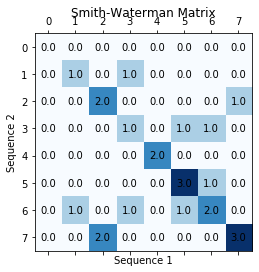

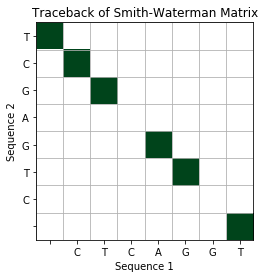

In [12]:
S1= "CTCAGGT"    
S2= "CTGAGCT"

main(S1,S2)